In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io.votable import parse_single_table
from astropy.io.votable import parse
import numpy as np
from astropy import constants as const
from astropy import units as u
import os

In [2]:
folder = 'C:\\Users\\gamak\\Documents\\Papers\\RTT_Variables\\'

In [2]:

files = [file for file in os.listdir(folder) if file[-3:] == 'vot']
c = const.c.to('m/s').value * 10**(10)

C:\Users\gamak\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\gamak\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\gamak\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


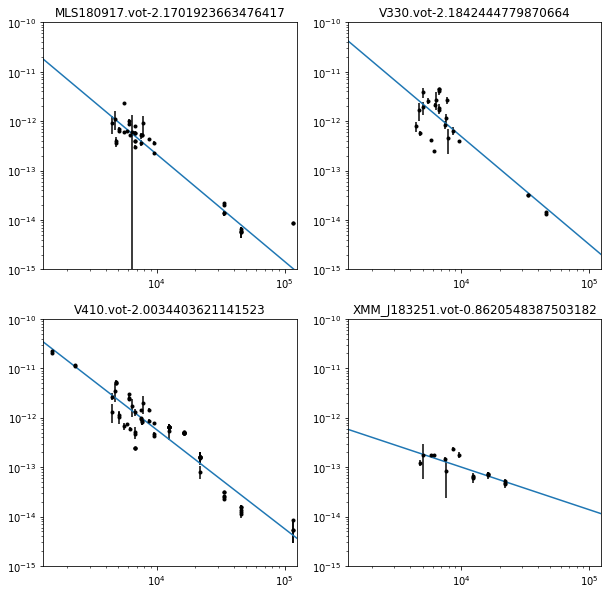

In [186]:
fig = plt.figure(figsize=(10,10))
for i, file in enumerate(files):
    votable = parse(folder+file)
    table = votable.get_first_table()
    freq = c / (table.array['sed_freq'] * 10**(9))
    flux = table.array['sed_flux'] * c / freq**2 * 10**(-26) * 10 ** (7)
    err = table.array['sed_eflux'] * c / freq**2 * 10**(-26) * 10 ** (7)
    j = [f for f in range(freq.shape[0]) if (freq[f] > 10**3 and freq[f] < 10**5)]
    f1 = np.polyfit(np.log10(freq[j]), np.log10(flux[j]), 1)
    xnew = np.arange(3,6,0.1)
    ynew = np.polyval(f1, xnew)
    plt.subplot(2,2,i+1)
    plt.errorbar(freq, flux, yerr = err, fmt = '.k')
    plt.plot(10**xnew,10**ynew, '-')
    plt.xlim(1300,125000)
    plt.ylim(1e-15,1e-10)
    plt.title(file+ str(f1[0]))
    plt.loglog()

In [271]:
w=[4468.71,4471]
(w[0]-w[1])/w[1]*const.c.to('km/s').value

-153.5505991545491

In [266]:
A = np.array([103,117,127,101])
W = np.array([20,19,18,17])
f_c = np.array([2.45,3.7,4.8,5.3]) 
f = A - f_c*W

In [267]:
f

array([54. , 46.7, 40.6, 10.9])

In [2]:
phot_xmm = pd.read_csv('e:\\Observations\\RTT150\\T20201004\\aper_phot1.csv')


In [254]:
from astropy.stats import biweight_location
from astropy.stats import biweight_scale
std = biweight_scale(phot_xmm['Chk1'])
med = biweight_location(phot_xmm['Chk1'])
phot_xmm['Chk1'][23] = med
yerr = std*(10**((phot_xmm['Obj1'] - med)/2.5))

In [13]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

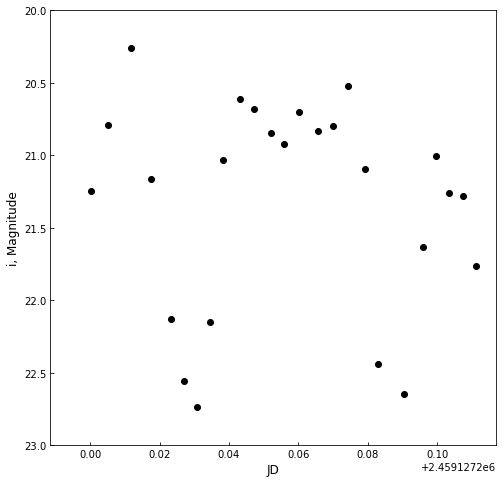

In [7]:
fig = plt.figure(figsize=(8,8))
plt.errorbar(phot_xmm['T (JD)'], smooth(phot_xmm['Obj1'],2), fmt = 'ok')
#plt.errorbar(phot_xmm['T (JD)'], smooth(phot_xmm['Chk1'],2), yerr = std, fmt = '.k')
plt.xlabel('JD',size = 'large')
plt.ylabel('i, Magnitude', size = 'large')
plt.tick_params(direction = 'in')
plt.ylim(23,20.)
plt.savefig(folder+'fig01.eps')

In [3]:
v330 = pd.read_csv('e:\\Observations\\RTT150\\T20201004\\for_period_new.dat', header = None)
#period = 0.0873
#period = 0.0926712
#period = 0.0639747
period = 0.05956

In [4]:
ph = pd.Series([(JD - v330.iloc[0][0])/period - int((JD - v330.iloc[0][0])/period) for JD in v330.iloc[:][0]]) 
mag = pd.Series(v330.iloc[:][1])
mag2 = mag.append(mag,ignore_index=1)
ph2 = ph.append(ph+1,ignore_index=1)

In [5]:
pd.DataFrame([[ph[i], mag[i]] for i in range(ph.shape[0])]).sort_values(1)

,0,1
1,0.179819,20.045
2,0.293318,20.478
15,0.271491,20.514
16,0.344023,20.522
8,0.739255,20.535
13,0.107790,20.583
10,0.888348,20.665
9,0.821357,20.693
20,0.768972,20.812
12,0.032572,20.818


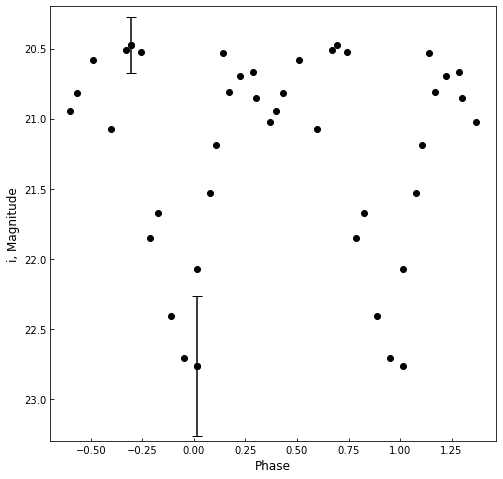

In [7]:
dph=0.6
fig05 = plt.figure(figsize=(8,8))
plt.plot(ph2-dph,mag2,'ok')
plt.errorbar([0.293318-dph,0.612660-dph],[20.478,22.764], yerr = [0.2,0.5], fmt='ok', capsize = 5)
#plt.plot(tab.keys(),tab.values(),'ob')
plt.ylim(23.3,20.2)
#plt.xlim(-.13,0.08)
plt.xlabel('Phase',size = 'large')
plt.ylabel('i, Magnitude', size = 'large')
#plt.ylabel('Relative magnitude', size = 'large')
plt.tick_params(direction = 'in')
#plt.show()
plt.savefig(folder+'fig01.jpeg')

In [16]:
w=2
tab = {ph2[i:i+w].mean()-0.25:mag2[i:i+w].mean() for i in range(0,mag2.shape[0],w)}